# AutoEncode
---
- 표현(특징) 학습
    * 데이터에서 주요 특징을 찾아 압축 후 복원하는 학습 모델
- 구성
    * 인코더(Encoder) : 입력 데이터에서 주요 특징 추출
    * 디코더(Decoder) : 주요 특징에서 원 데이터로 복원
    

In [ ]:
import tensorflow as tf
from keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [ ]:
set_random_seed(42)

## [1] 데이터 준비 및 로딩

In [ ]:
(X_train_base, y_train_base), (X_test_base, y_test) = load_data()

In [ ]:
X_train_base.shape, y_train_base.shape

((60000, 28, 28), (60000,))

## [2] 데이터 전처리

In [ ]:
def scaled_reshape(data):
    data_scaled = data/255.0
    data_reshape = data_scaled.reshape(-1, data_scaled.shape[1] * data_scaled.shape[2])
    return data_reshape

In [ ]:
X_train_base = scaled_reshape(X_train_base)
X_test = scaled_reshape(X_test_base)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_base, y_train_base
)

## [3] 모델 구성 및 생성 함수

In [ ]:
def make_model(n_node:int):
    model = Sequential()
    # 입력
    model.add(Dense(units=n_node, activation="relu", input_shape=(28*28,)))
    # 출력
    model.add(Dense(784, activation="sigmoid"))
    model.compile(
        loss="mse",
        optimizer="adam"
    )
    return model

## [4] 모델 학습

In [ ]:
model_list = [1, 10, 30, 50, 100, 200]
pred_list = []

for i in model_list:
    model = make_model(i)
    model.fit(X_train, X_train, verbose=0, epochs=1)

    pred = model.predict(X_train)[0].reshape(28,28)

    pred_list.append(pred)


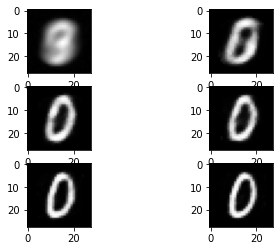

In [ ]:
for i in range(len(model_list)):
    plt.subplot(3,2,i+1)
    plt.imshow(pred_list[i], cmap="gray")